In [1]:
import glob
import pandas as pd
import numpy as np
import nltk


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#한글로된 일본어가사, 영어로된 중국어가사 드랍한 버전
data = pd.read_csv("/content/gdrive/My Drive/ipynb/전처리_2.tsv",sep='\t',encoding='utf-8')

In [4]:
data.head()

,Unnamed: 0,년도,가수,제목,성별,장르,가사
0,0,19920000,잼,난 멈추지 않는다,mixed,댄스,"['이제', '모든걸', '다시', '시작해', '내겐', '아직도', '시간이',..."
1,1,19920000,잼,우리 모두 사랑하자,mixed,댄스,"['워', '우리', '모두', '사랑하자', '우리의', '젊은날을', '위하여'..."
2,2,19920000,잼,이유,mixed,발라드,"['어둠은', '드리워지고', '이제는', '우리들만의', '시간이', '지친듯이'..."
3,3,19920000,잼,18번가의 비밀,mixed,댄스,"['끝없는', '어둠', '속을', '천천히', '걷고', '있어', '어디서', ..."
4,4,19920000,잼,요즘 친구들,mixed,댄스,"['요즘', '친구들은', '흥', '정말', '진정한', '친구가', '뭔지', ..."


In [5]:
lyrics=data['가사']

다시 전처리 하기 위해 가사 역토큰화


In [6]:
for i in range(len(lyrics)):
  lyrics[i]=lyrics[i].replace("'","")
  lyrics[i]=lyrics[i].replace("[","")
  lyrics[i]=lyrics[i].replace("]","")
  lyrics[i]=lyrics[i].replace(" ","")
  lyrics[i]=lyrics[i].replace(","," ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [7]:
lyrics

0       이제 모든걸 다시 시작해 내겐 아직도 시간이 있어 때론 상처가 좌절로 남아 돌이킬수...
1       워 우리 모두 사랑하자 우리의 젊은날을 위하여 우리 모두 춤을 추자 가벼운 인스텝 ...
2       어둠은 드리워지고 이제는 우리들만의 시간이 지친듯이 내 가슴속에 밀려와 나를 재우고...
3       끝없는 어둠 속을 천천히 걷고 있어 어디서 본 듯한 야릇한 느낌이야 거리는 비에 젖...
4       요즘 친구들은 흥 정말 진정한 친구가 뭔지 잘 몰라 말로만 떠들고 자기들이 다만 그...
                              ...                        
5696    너와의 기억은 검은 그림자처럼 내 주윌 맴돌아 이별의 슬픔은 하얀 안개처럼 문득 날...
5697    기적 같은 건 내 눈에 담긴 너 이 기적 이 기적 이 기적이 날 떠나버린 것 같아 ...
5698    누군가의 품에서 잠을 깨던 어린 나 요람 안을 감싼 온기 언제부터였을까 나를 알지 ...
5699    영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...
5700    Trouble 이래 다 그래 세 보인대 어쩔래 난 멋 부리네 더 꾸미네 yeah I...
Name: 가사, Length: 5701, dtype: object

nltk를 이용한 토큰화, 영어 불용어제거

In [8]:
import nltk                  
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
token_lyrics=[]
for i in range(0,len(lyrics)):
  token=nltk.word_tokenize(lyrics[i].lower())
  token_lyrics.append(token)

In [10]:
data['가사']=token_lyrics

In [11]:
stopwords_eng=set(stopwords.words('english')) #nltk 불용어 목록 


In [12]:
#불용어 목록 추가
stopwords_eng.update(["oh","la","hey","yeah","woo","ah","na","ye"
                      ,"im","so","ooh","uh","yo","na","wow","hoo","eh","nt","baby","babi",
                      "ya","du","ha","du",
                      "da","no","bo","yeh","wuh","tu","huh","mr","supa","dupa"])


In [13]:
data['가사']=data['가사'].apply(lambda list: [x for x in list if x not in stopwords_eng])

한국어 불용어 제거

In [14]:
word_kor=pd.read_csv('/content/gdrive/My Drive/ipynb/한국어 불용어.txt', encoding = 'utf-8',names=['word'])

In [15]:
stopword_kor=word_kor['word']
stopwords_kor=set(stopword_kor)
stopwords_kor.update(["어어어어","바라바","나나"])



In [16]:
data['가사']=data['가사'].apply(lambda list: [x for x in list if x not in stopwords_kor])

In [17]:
data

,Unnamed: 0,년도,가수,제목,성별,장르,가사
0,0,19920000,잼,난 멈추지 않는다,mixed,댄스,"[이제, 모든걸, 다시, 시작해, 내겐, 아직도, 시간이, 있어, 때론, 상처가, ..."
1,1,19920000,잼,우리 모두 사랑하자,mixed,댄스,"[워, 사랑하자, 우리의, 젊은날을, 춤을, 추자, 가벼운, 인스텝, 속에, 그대와..."
2,2,19920000,잼,이유,mixed,발라드,"[어둠은, 드리워지고, 이제는, 우리들만의, 시간이, 지친듯이, 내, 가슴속에, 밀..."
3,3,19920000,잼,18번가의 비밀,mixed,댄스,"[끝없는, 어둠, 속을, 천천히, 걷고, 있어, 어디서, 본, 듯한, 야릇한, 느낌..."
4,4,19920000,잼,요즘 친구들,mixed,댄스,"[요즘, 친구들은, 정말, 진정한, 친구가, 뭔지, 잘, 몰라, 말로만, 떠들고, ..."
...,...,...,...,...,...,...,...
5696,5771,20200924,업텐션 (UP10TION),니가 보여 (Waiting For You),남,R&B/Soul,"[너와의, 기억은, 검은, 그림자처럼, 내, 주윌, 맴돌아, 이별의, 슬픔은, 하얀..."
5697,5772,20200924,업텐션 (UP10TION),빈집 (텅) (Empty House),남,R&B/Soul,"[기적, 같은, 건, 내, 눈에, 담긴, 기적, 기적, 기적이, 날, 떠나버린, 같..."
5698,5773,20200926,엔플라잉 (N.Flying),From You,남,"록/메탈, 국내드라마","[누군가의, 품에서, 잠을, 깨던, 어린, 요람, 안을, 감싼, 온기, 언제부터였을..."
5699,5774,20201002,BLACKPINK,Lovesick Girls,female,댄스,"[영원한, 밤, 창문, 없는, 방에, 우릴, 가둔, love, say, 아파도, 외..."


영어가사 품사 태깅 후 명사만 추출

In [18]:
lyrics_n=data['가사']
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
lyrics_j=[]
for i,document in enumerate(lyrics_n):
  stem_words_eng=[]
  for word in nltk.pos_tag(document):
    if word[1] in ['NN','NNP']:
      stem_words_eng.append(word[0])
  lyrics_j.append(stem_words_eng)

한국어가사 품사 태깅 후 명사,동사,형용사 추출

In [20]:
!pip install konlpy

In [21]:
from konlpy.tag import Okt

In [22]:
okt=Okt()

In [23]:
lyrics_k=[]
for i in lyrics_j:
  lyric=' '.join(i)
  lyrics_k.append(lyric)

In [24]:
lyrics_o=[]
for i,document in enumerate(lyrics_k):
  stem_words_kor=[]
  for word in okt.pos(document,stem=True):
    if word[1] in ['Noun','Adjective','Verb','Alpha']:
      stem_words_kor.append(word[0])
  lyrics_o.append(stem_words_kor)

In [25]:

train=[]
for i,line in enumerate(lyrics_o):
  ary=[]
  for word in line:
    if len(word)>1:
      ary.append(word)
  train.append(ary)

In [27]:
from collections import Counter
list=[]
freq=Counter(list)
for words in train:
  freq.update(Counter(words))


In [28]:
print(freq.most_common(n=50))

[('하다', 32888), ('있다', 13512), ('사랑', 13215), ('없다', 12578), ('보다', 9800), ('않다', 6965), ('그대', 6207), ('같다', 5648), ('나르다', 5616), ('내다', 5213), ('싶다', 4910), ('모르다', 4656), ('되다', 4318), ('버리다', 4172), ('돼다', 4073), ('이제', 3584), ('마음', 3391), ('다시', 3369), ('사람', 3186), ('오다', 3136), ('알다', 3067), ('지금', 3060), ('love', 2992), ('가다', 2908), ('생각', 2856), ('그렇다', 2835), ('세상', 2772), ('아니다', 2738), ('오늘', 2678), ('주다', 2626), ('아프다', 2581), ('잊다', 2575), ('girl', 2562), ('눈물', 2454), ('해주다', 2433), ('나다', 2412), ('시간', 2348), ('모든', 2332), ('가슴', 2284), ('들다', 2268), ('좋다', 2224), ('떠나다', 2184), ('기다리다', 2167), ('순간', 2098), ('기억', 2035), ('웃다', 1996), ('우리', 1933), ('모습', 1919), ('원하다', 1859), ('믿다', 1823)]


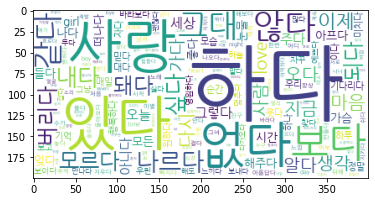

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = WordCloud(font_path='/content/gdrive/My Drive/ipynb/NanumGothic.ttf',background_color='white')
plt.imshow(word_cloud.generate_from_frequencies(freq))
plt.show()

In [31]:
from gensim import corpora
dictionary = corpora.Dictionary(train) #정수 인코딩과 빈도수 생성

#문서를 back of word 형식(token_id,token_count)으로 변환
corpus = [dictionary.doc2bow(text) for text in train] 

print(corpus[1])    #(m,n) -> 두번째 노래 가사에서 정수 m로 할당된 단어가 n번 등장

[(2, 1), (14, 3), (15, 2), (17, 5), (19, 1), (22, 1), (23, 10), (26, 5), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 5), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 8), (45, 1), (46, 1), (47, 1), (48, 5), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 5), (59, 1), (60, 2), (61, 2), (62, 1), (63, 5), (64, 1), (65, 1), (66, 1)]


In [32]:
print(dictionary[8]) #값 8을 가지는 기존 단어

상처


In [33]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import gensim

In [34]:
coherence_values=[]
for num_topics in range(2,16):
  model=gensim.models.ldamodel.LdaModel(corpus,num_topics=num_topics,id2word=dictionary)
  coherencemodel=CoherenceModel(model,texts=train,dictionary=dictionary)
  coherence_values.append(coherencemodel.get_coherence())

<function matplotlib.pyplot.show>

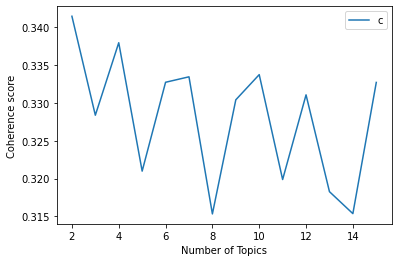

In [35]:
x=range(2,16)
plt.plot(x,coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_value"),loc='best')
plt.show

In [36]:
import gensim
N_TOPICS = 7   #토픽의 개수 (하이퍼 파라미터)

ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=N_TOPICS,id2word=dictionary,passes=15) #passes = 말뭉치 통과 횟수



In [37]:
!pip install pyLDAvis

In [38]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [39]:
def make_topictable_per_lyrics(ldamodel, corpus):
    topic_table = pd.DataFrame()
    
    # 몇 번째 가사인지를 의미하는 가사 번호와 해당 가사의 토픽 비중을 한줄씩 꺼내오기
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key = lambda x : (x[1]), reverse = True)
        # 각 가사들에 대해서 비중이 높은 토픽순으로 토픽 정렬
        
        # 모든 가사에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): # 몇 번 토픽인지와 비중을 나눠서 저장한다
            if j == 0: # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_list]), ignore_index = True)
            else:
                break
        return(topic_table)

In [43]:
kk = ldamodel.show_topic(0,topn=80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2.head(10)

,0,1
0,하다,0.045158
1,보다,0.025532
2,있다,0.016045
3,모르다,0.014551
4,같다,0.013302
5,싶다,0.012797
6,내다,0.010225
7,좋다,0.009158
8,나르다,0.008891
9,오늘,0.008878


In [44]:
topictable = make_topictable_per_lyrics(ldamodel, corpus)
topictable = topictable.reset_index()
topictable.columns= ['가사','가장 비중이 높은 토픽','가장 높은 토픽의 비중','각 토픽의 비중']
topictable[:100]

,가사,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,5.0,0.8184,"[(1, 0.09109823), (4, 0.08263359), (5, 0.81842..."


In [ ]:
from gensim.test.utils import datapath

In [ ]:
'''
lda_file = datapath("model")
ldamodel.save("lda_file")

from google.colab import files
files.download("lda_file")
'''

In [45]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(1, 0.09112855), (4, 0.08234387), (5, 0.8186861)]
1 번째 문서의 topic 비율은 [(0, 0.08245225), (5, 0.5171792), (6, 0.394276)]
2 번째 문서의 topic 비율은 [(0, 0.24001007), (5, 0.7494551)]
3 번째 문서의 topic 비율은 [(0, 0.6963194), (4, 0.06511836), (5, 0.23233578)]
4 번째 문서의 topic 비율은 [(0, 0.010152871), (4, 0.09314773), (5, 0.7997705), (6, 0.09271796)]
